In [3]:
import xarray as xr
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LinearRegression,Lasso



# Dataset

In [5]:
hourlydata=xr.open_dataset(r'C:\Users\Harshit Jain\Desktop\delhiaq\daily_data.nc')
df=hourlydata.to_dataframe()
#print(df1)
df.dropna(subset=['PM2.5'],inplace=True)

df.reset_index(inplace=True)
df.columns = df.columns.str.lower()

df = df[df['date'].dt.year != 2023]
df.rename(columns={'Date':'date','pm2.5':'pm25','ozone':'o3','tot-rf':'totrf'}, inplace=True)
#df = df[df['station'] == 'Wazirpur, Delhi - DPCC']
print(df)
print(df.shape)
print(df.columns)
print(df.dtypes)

       index                 station       date   latitude  longitude  \
0          0    Alipur, Delhi - DPCC 2022-01-01  28.815329  77.153010   
1          1    Alipur, Delhi - DPCC 2022-01-02  28.815329  77.153010   
2          2    Alipur, Delhi - DPCC 2022-01-03  28.815329  77.153010   
3          3    Alipur, Delhi - DPCC 2022-01-04  28.815329  77.153010   
4          4    Alipur, Delhi - DPCC 2022-01-05  28.815329  77.153010   
...      ...                     ...        ...        ...        ...   
13736  13736  Wazirpur, Delhi - DPCC 2022-12-27  28.699793  77.165453   
13737  13737  Wazirpur, Delhi - DPCC 2022-12-28  28.699793  77.165453   
13738  13738  Wazirpur, Delhi - DPCC 2022-12-29  28.699793  77.165453   
13739  13739  Wazirpur, Delhi - DPCC 2022-12-30  28.699793  77.165453   
13740  13740  Wazirpur, Delhi - DPCC 2022-12-31  28.699793  77.165453   

             pm25        pm10         no        no2         nox  ...  \
0      222.291667  354.069583  47.078333  44.584167

# Shape File

In [4]:
gdf_shape = (r'C:\Users\Harshit Jain\Desktop\delhiaq\Delhi\Districts.shp')
gdf_shape = gpd.read_file(gdf_shape)
print(gdf_shape)

   OBJECTID    DISTRICT                  STATE  \
0        99     Central  Nation Capital Region   
1       167        East  Nation Capital Region   
2       417  North East  Nation Capital Region   
3       413       North  Nation Capital Region   
4       420  North West  Nation Capital Region   
5       411   New Delhi  Nation Capital Region   
6       544       South  Nation Capital Region   
7       550  South West  Nation Capital Region   
8       613        West  Nation Capital Region   

                                            geometry  
0  POLYGON ((77.26042 28.62286, 77.25705 28.62268...  
1  POLYGON ((77.30482 28.57678, 77.29593 28.58194...  
2  POLYGON ((77.25066 28.66244, 77.25021 28.66266...  
3  POLYGON ((77.21434 28.78352, 77.21329 28.78031...  
4  POLYGON ((77.17093 28.66833, 77.16689 28.67303...  
5  POLYGON ((77.26042 28.62286, 77.26267 28.62114...  
6  POLYGON ((77.26455 28.60747, 77.26558 28.60738...  
7  POLYGON ((77.18253 28.64817, 77.18380 28.64638...  
8  P

# Vayu Implementation

C:\Users\Harshit Jain\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Harshit Jain\anaconda3\lib\site-packages\vayu\interpolPlot.py:162: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4269 +type=crs

  inter = geopandas.overlay(shape_df, gdf, how="intersection")
C:\Users\Harshit Jain\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

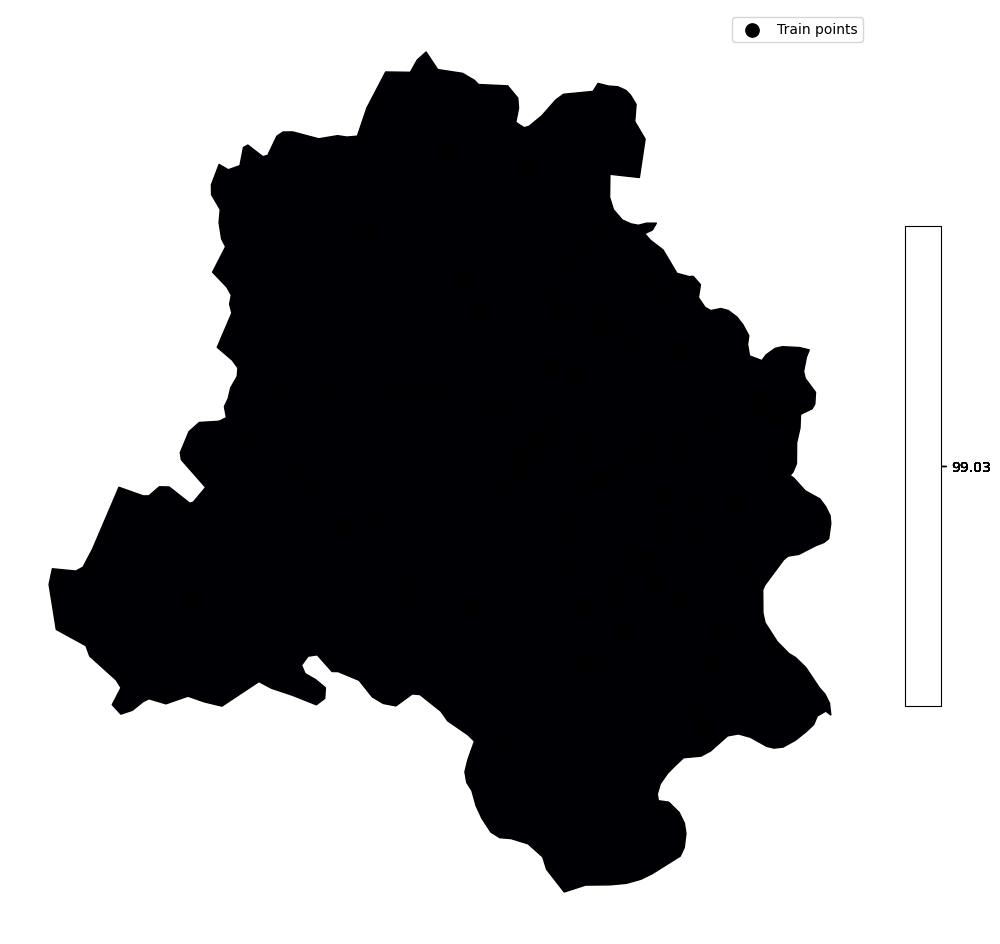

In [8]:
from vayu.interpolPlot import interpolPlot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

gdf_shape = (r'C:\Users\Harshit Jain\Desktop\delhiaq\Delhi\Districts.shp')
gdf_shape = gpd.read_file(gdf_shape)


interpolator = Lasso()
#interpolator = LinearRegression()





interpolPlot(df, gdf_shape, 'longitude','latitude', 'pm25', interpolator, resolution=50, partitions=15, cmap='inferno', Tcolor='k', markersize=0.3, plot_train_points=True, extrapolate=True)
#interpolPlot(df1, gdf_shape, x,y, 'pm25', interpolator, resolution=50, partitions=15, cmap='inferno', Tcolor='k', markersize=3, plot_train_points=False, extrapolate=False)